In [43]:
import database
import plasma
import matplotlib.pyplot as plt
import importlib
importlib.reload(database)
importlib.reload(plasma)

<module 'plasma' from '/home/hmturner/Documents/disruption-warning-db-workflow/src/plasma.py'>

In [44]:
    test_handler = database.create_cmod_handler()
    test_shot = test_handler.get_shot('1150922004')
    test_shot.data.sort_values('time').head()

/home/hmturner/.local/lib/python3.8/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


AttributeError: 'DataFrame' object has no attribute 'sort_valuesb'

In [45]:
print(test_handler.data_columns)

['dbkey', 'shot', 'time', 'time_until_disrupt', 'ip_error', 'dip_dt', 'beta_p', 'beta_n', 'li', 'n_equal_1_normalized', 'z_error', 'v_z', 'z_times_v_z', 'kappa', 'pressure_peaking', 'H98', 'q0', 'qstar', 'q95', 'v_0', 'v_mid', 'v_edge', 'dn_dt', 'p_rad_slow', 'p_oh_slow', 'p_icrf', 'p_lh', 'radiated_fraction', 'power_supply_railed', 'v_loop_efit', 'r_dd', 'lower_gap', 'upper_gap', 'dbetap_dt', 'dli_dt', 'ip', 'zcur', 'n_e', 'dipprog_dt', 'v_loop', 'p_rad', 'p_oh', 'ssep', 'dWmhd_dt', 'dprad_dt', 'v_0_uncalibrated', 'Te_width', 'Greenwald_fraction', 'intentional_disruption', 'Te_width_ECE', 'Wmhd', 'n_over_ncrit', 'n_equal_1_mode', 'Mirnov', 'Mirnov_norm_btor', 'Mirnov_norm_bpol', 'Te_peaking', 'ne_peaking', 'Te_peaking_ECE', 'SXR_peaking', 'kappa_area', 'I_efc', 'SXR', 'H_alpha', 'Prad_peaking_CVA', 'commit_hash']


In [8]:
test_handler.query("alter table disruption_warning add commit_hash TEXT")

DatabaseError: com.microsoft.sqlserver.jdbc.SQLServerException: Column names in each table must be unique. Column name 'commit_hash' in table 'disruption_warning' is specified more than once.

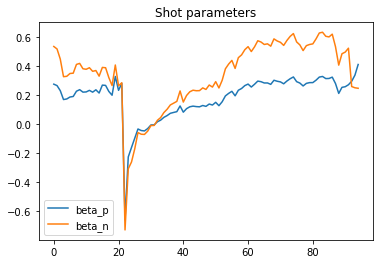

In [12]:
plt.figure()
plt.title('Shot parameters')
plt.plot(test_shot['beta_p'],label='beta_p')
plt.plot(test_shot['beta_n'],label='beta_n')
plt.legend()

In [17]:
importlib.reload(database)
importlib.reload(plasma)

<module 'plasma' from '/home/hmturner/Documents/disruption-warning-db-workflow/src/plasma.py'>

In [6]:
shot = plasma.Shot('cmod', 1150922001)
shot.data.head()

%TREE-E-FOPENR, Error opening file read-only.
%TREE-E-INVPATH, Invalid tree pathname specified


,times,time_until_disrupt,ip,dip,dip_smoothed,p_ohm,v_loop,p_rad,dprad,p_lh,...,li,li_dot,q0,qstar,q95,V_loop_efit,Wmhd,dWmhd_dt,ssep,n_over_ncrit
0,0.06,99.940002,362075.5625,6260105.00,6.049916e+06,7.572240e+04,5.075586,12.570879,3048.476562,0.0,...,1.882671,-35.228939,1.043756,7.524931,6.345780,3.997224,-25292.869141,489418.843750,40.0,-0.140618
1,0.08,99.919998,482791.8750,5876613.50,6.013495e+06,1.031880e+06,5.164196,18.070639,4042.331055,0.0,...,1.178092,-20.013367,1.078733,6.259056,5.815024,3.908666,-15504.492188,217329.375000,40.0,-0.352229
2,0.10,99.900002,588626.7500,1954502.75,4.660665e+06,1.237649e+06,4.257461,29.070158,6643.189941,0.0,...,1.082136,-0.927790,1.120945,5.319927,4.939097,3.586226,-16599.695312,73384.843750,40.0,-0.360872
3,0.12,99.879997,656106.8125,1568255.75,1.066830e+06,2.206005e+06,3.882335,33.081551,14273.819336,0.0,...,1.140980,0.534153,1.126533,5.081687,4.593039,3.225115,-12569.095703,295953.593750,40.0,-0.360295
4,0.14,99.860001,685070.4375,1568426.00,1.530042e+06,1.349109e+06,2.690682,34.983189,-8259.205078,0.0,...,1.103502,2.764685,1.102749,5.276523,4.798643,2.842839,-4761.549805,153448.765625,40.0,-0.560931


In [15]:
set(list(test_shot.data.dtypes))

{dtype('int64'), dtype('float64'), dtype('O')}

In [8]:
shot['times'].dtype
shot['v_loop'].dtype

dtype('float32')

In [ ]:
def create_new_timebase(shot):
    return timebase 

dbh = SQLHandler('disruption shot database')
disruption_shots = dbh.get_disruption_shots()
for disruption_shot_id,disruption_shot_time in disruption_shots:
    disruption_shot = Cmod_shot(disruption_shot_id,timebase='method') # 
    disruption_shot['times'] = f(shot) # Add logic to handle time key differently
    dbh.upload_shot(disruption_shot)


